In [59]:
# Import python libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


DATA CLEANING

In [33]:
# Load the dataset
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [34]:
# Display first 5 rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [35]:
# Display the shape 
print("Initial Shape:", df.shape)

Initial Shape: (11251, 15)


In [36]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


In [37]:
# Drop unnecessary/blank columns
columns_to_drop = ['Status', 'unnamed1']
df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [38]:
#Check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [39]:
# Drop null values
df.dropna(inplace=True)

In [40]:
# Change data types
df['Amount'] = df['Amount'].astype(int)
df['Amount'].dtypes

dtype('int32')

In [41]:
# Check for duplicates
df.drop_duplicates(inplace=True)

In [54]:
# Convert Amount column to NumPy array
amount_np = df['Amount'].values
print(amount_np)

[23952 23934 23924 ...   213   206   188]


In [55]:
# Numpy Calculations on Sales amount
print("Total Sales amount:", np.sum(amount_np))
print("Average Sales:", np.mean(amount_np))
print("Maximum Sale:", np.max(amount_np))
print("Minimum Sale:", np.min(amount_np))

Total Sales amount: 106178825
Average Sales: 9454.084676342267
Maximum Sale: 23952
Minimum Sale: 188


In [58]:
# Example: Filter high-value transactions
high_sales = amount_np[amount_np > 5000]
print("High-Value Transactions(> ₹5000):", high_sales.shape[0])

High-Value Transactions(> ₹5000): 9040


In [42]:
# Overall statistics
print("\nBasic Statistics:\n", df.describe())


Basic Statistics:
             User_ID           Age  Marital_Status        Orders        Amount
count  1.123100e+04  11231.000000    11231.000000  11231.000000  11231.000000
mean   1.003004e+06     35.411985        0.419998      2.489093   9454.084676
std    1.716055e+03     12.756116        0.493580      1.114880   5221.728074
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      2.000000   5443.000000
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004428e+06     43.000000        1.000000      3.000000  12677.500000
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000


EXPLORATORY DATA ANALYSIS


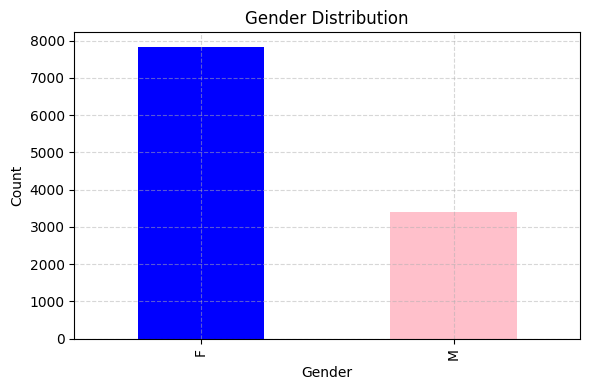

In [43]:
# Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

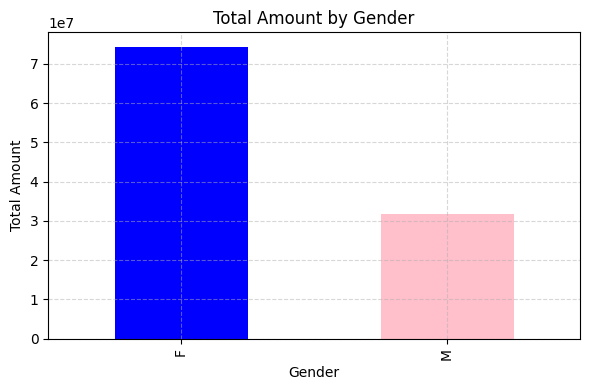

In [44]:
# Gender vs Amount
gender_amount = df.groupby('Gender')['Amount'].sum()
plt.figure(figsize=(6,4))
gender_amount.plot(kind='bar', color=['blue', 'pink'])
plt.title('Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

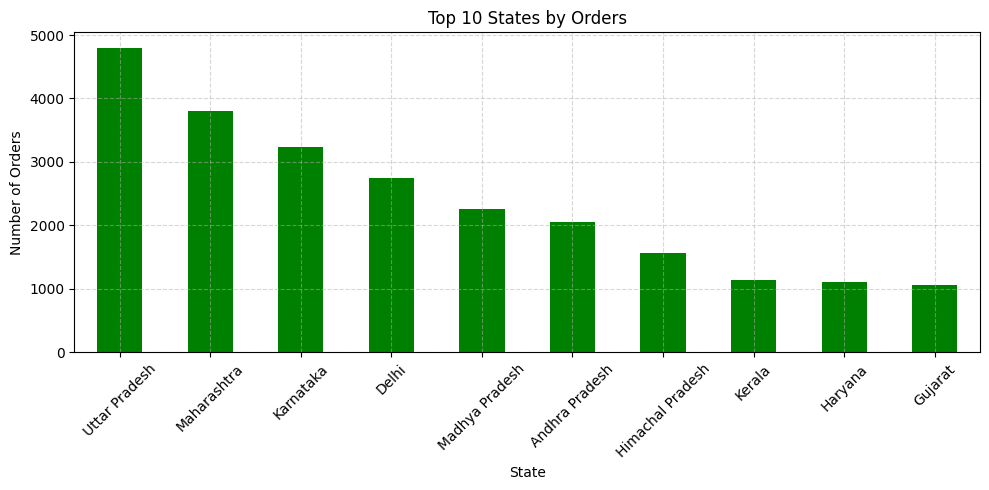

In [45]:
# State-wise Orders (Top 10)
state_sales = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
state_sales.plot(kind='bar', color='green')
plt.title('Top 10 States by Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

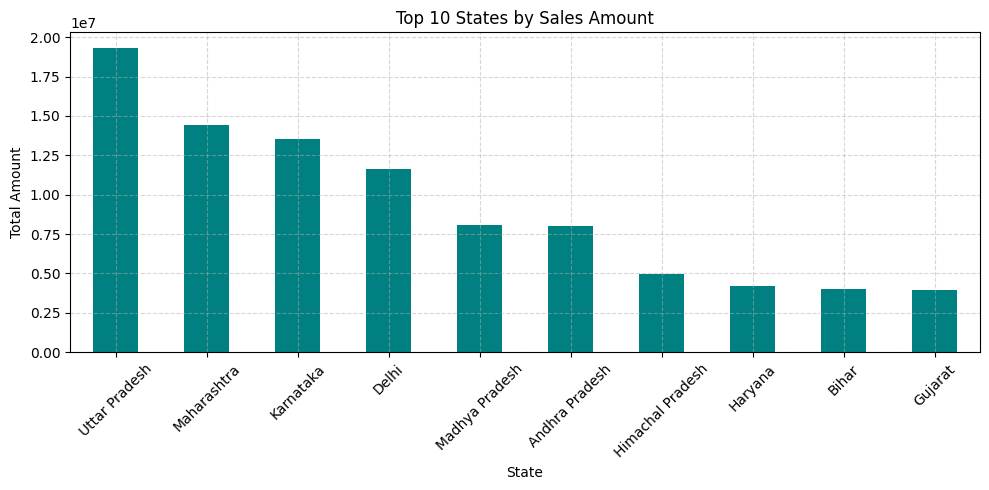

In [46]:
# State-wise Amount (Top 10)
state_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
state_amount.plot(kind='bar', color='teal')
plt.title('Top 10 States by Sales Amount')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

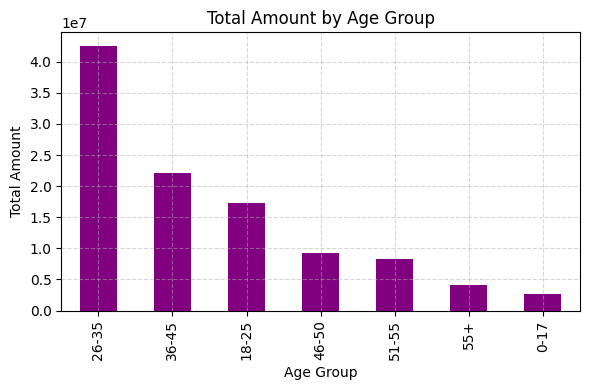

In [48]:
# Age Group vs Amount
age_amount = df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
age_amount.plot(kind='bar', color='purple')
plt.title('Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From above graph we can see that most of the buyers are of age group between 26-35 yrs female

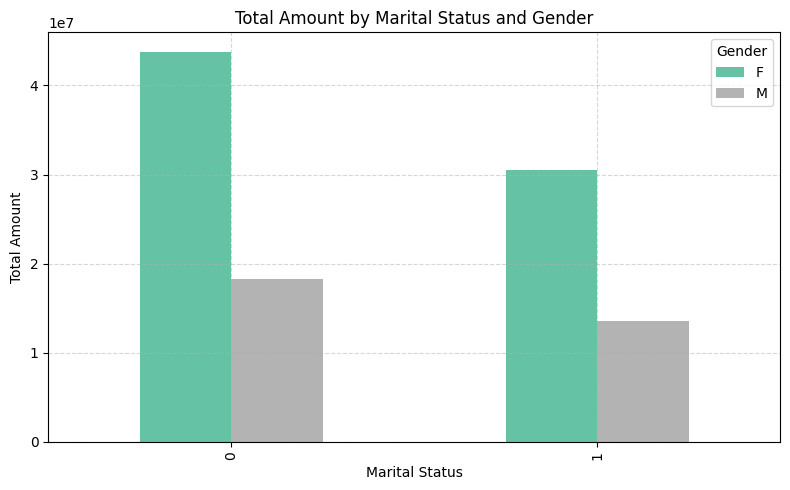

In [50]:
# Total Amount by Marital Status and Gender
group_mg = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().unstack()
group_mg.plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.title('Total Amount by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Total Amount')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From above graph we can see that most of the buyers are married (women) and they have high purchasing power

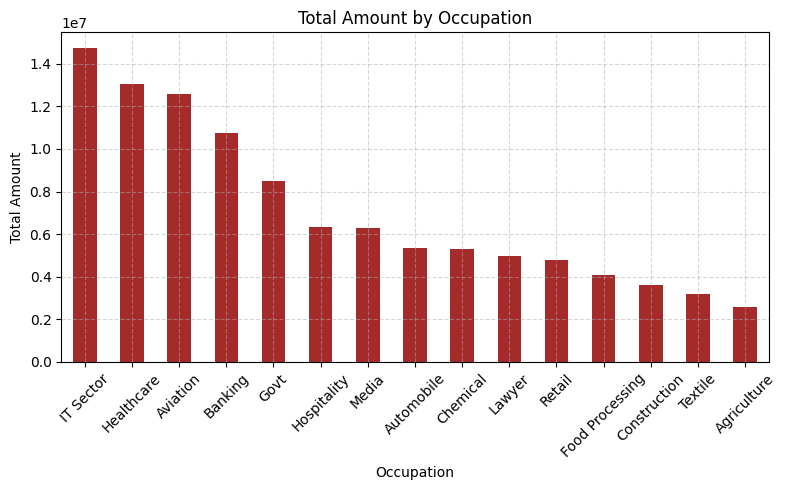

In [51]:
# Total Amount by Occupation
occupation_amount = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
occupation_amount.plot(kind='bar', color='brown')
plt.title('Total Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From above graph we can see that most of the buyers are working in IT, Healthcare and Aviation sector

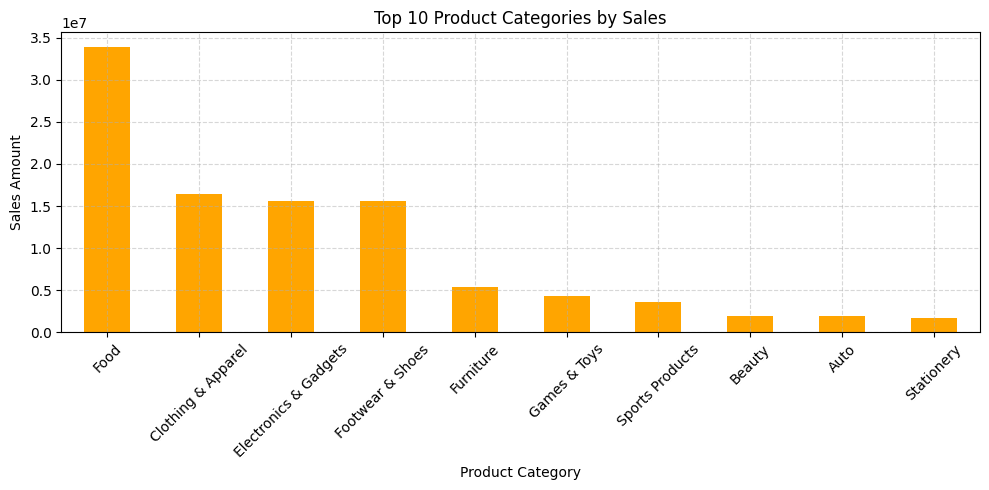

In [52]:
# Top Product Categories
top_categories = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_categories.plot(kind='bar', color='orange')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From above graph we can see that most of the sold products are from Food, Clothing and Electronics category

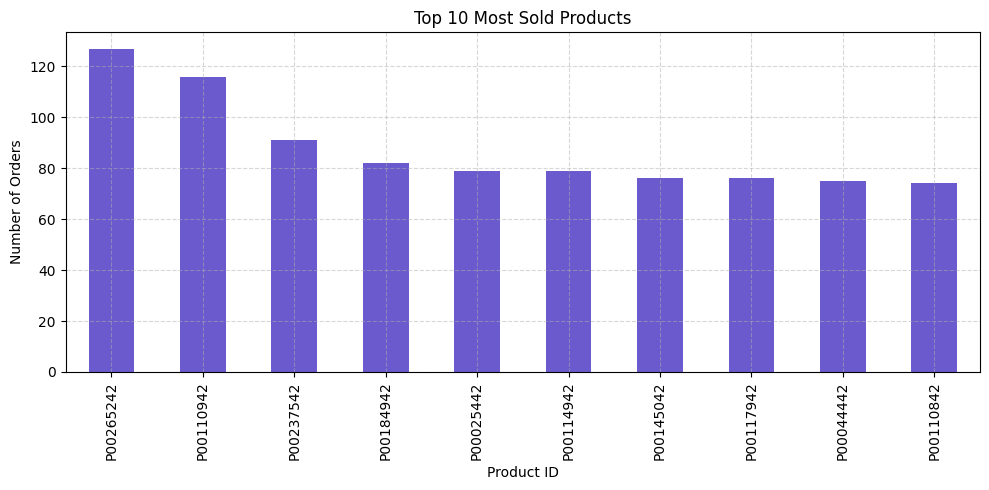

In [53]:
# Top 10 Most Sold Products
top_products = df.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='slateblue')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category